In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle

In [2]:
file = open('model_2d_A.pkl', 'rb')

info = pickle.load(file)
positions = pickle.load(file)
radii = pickle.load(file)

file.close()

n_discs = positions.shape[0]

Lets show now the figure of the resulting 2D random molecular model.

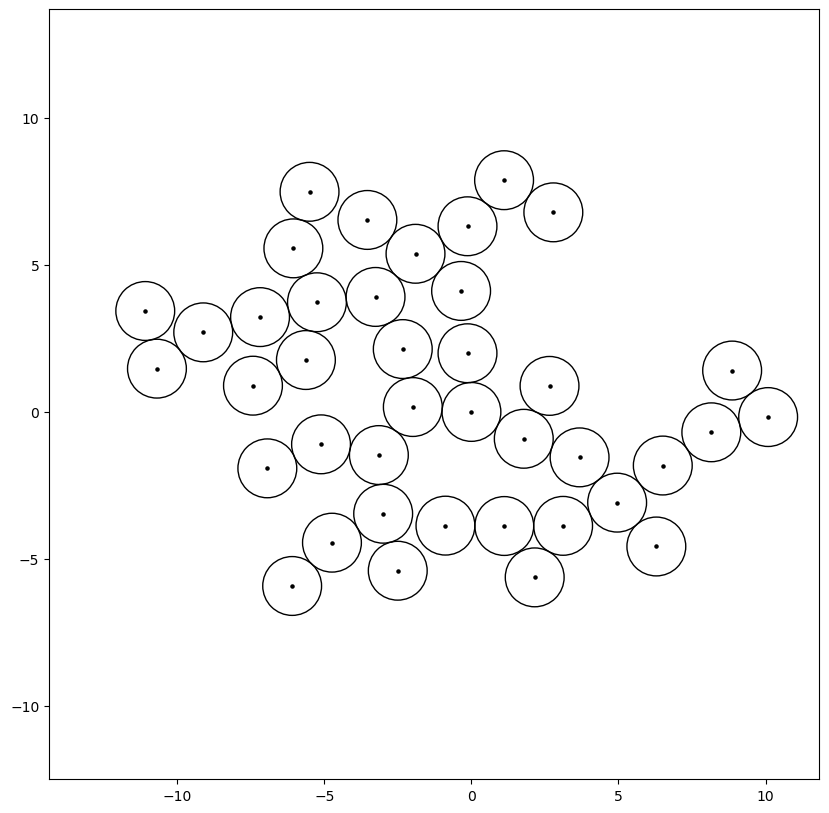

In [3]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radii[ii], color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2.0
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

## Voronoi diagrams

Use the coordinates of our previous model, scipy and matplotlib.

In [4]:
from scipy.spatial import Voronoi, voronoi_plot_2d

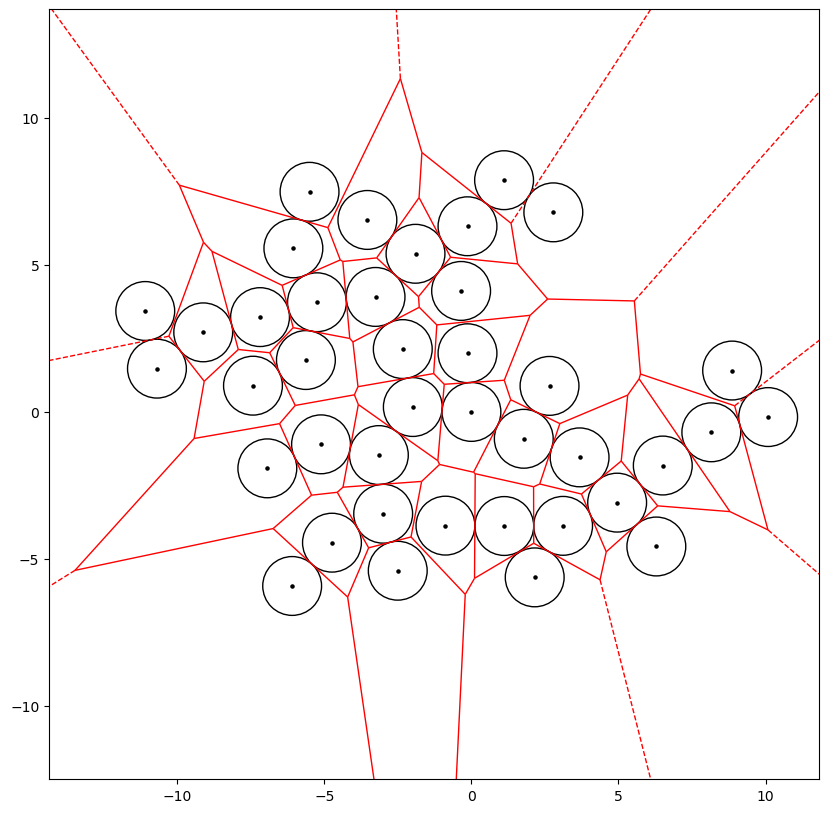

In [5]:
vor = Voronoi(positions, incremental=False)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r', s=4)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radii[ii], color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2.0
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

# What's the geometrical interpretation of the Voronoi diagram?

Given a set of two or more but a finite number of distinct points (in this case represented by the hard discs) in the Euclidean plane, we associate all locations in that space with the closest member(s) of the point set with respect to the Euclidean distance. The result is a tessellation of the plane into a set of the regions associated with members of the point set. We call this tessellation the planar ordinary Voronoi diagram generated by the point set, and the regions constituting the Voronoi diagram ordinary Voronoi polygons.

what is a tessellation?

Let S be a closed subset of R^m, Si be a closed subset of S and T = (S1,. . . , Sn) (when we deal with an infinite n, we assume that only finitely many S, hit a bounded subset of Rm). If elements in the set T satisfy that Si do not intersect with Sj except in the edges, and that the union of all Si is equal to S then we call the set T a tessellation of S.

Okabe, A.; Boots, B.; and Sugihara, K. Spatial Tessellations: Concepts and Applications of Voronoi Diagrams, 2nd ed. New York: Wiley, 2000.

# Dellanuy triangulation

Use the coordinates of our previous model, scipy and matplotlib.

In [6]:
from scipy.spatial import Delaunay

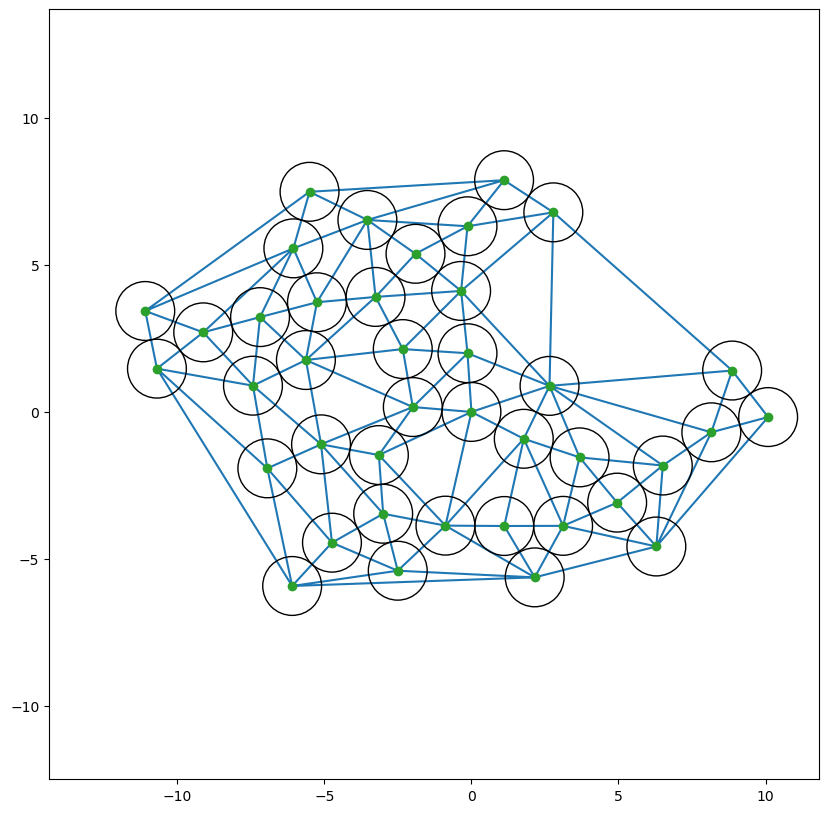

In [7]:
tri = Delaunay(positions)
plt.triplot(positions[:,0], positions[:,1], tri.simplices)

plt.plot(positions[:,0], positions[:,1],'o')


ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radii[ii], color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2.0
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])


plt.show()

# What's the geometrical interpretation of the Delaunay triangulation?

Given a Voronoi diagram where generator points are not collinear and their number is three or more but
finite, we join all pairs of generator points whose Voronoi polygons share the common Voronoi edge. 
As a result, we obtain a second tessellation. If this tessellation consists of only triangles, we call it a Delaunay triangulation. If not, we call it a Delaunay pretriangulation. For the Delaunay pretriangulation, we partition non-triangular polygons into triangles by non-intersecting line segments joining the vertices. 
As a result, the Delaunay pretriangulation becomes a triangulation. We also call it a Delaunay triangulation.

Okabe, A.; Boots, B.; and Sugihara, K. Spatial Tessellations: Concepts and Applications of Voronoi Diagrams, 2nd ed. New York: Wiley, 2000.

## Convex hull

Use the coordinates of our previous model, scipy and matplotlib.

In [8]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

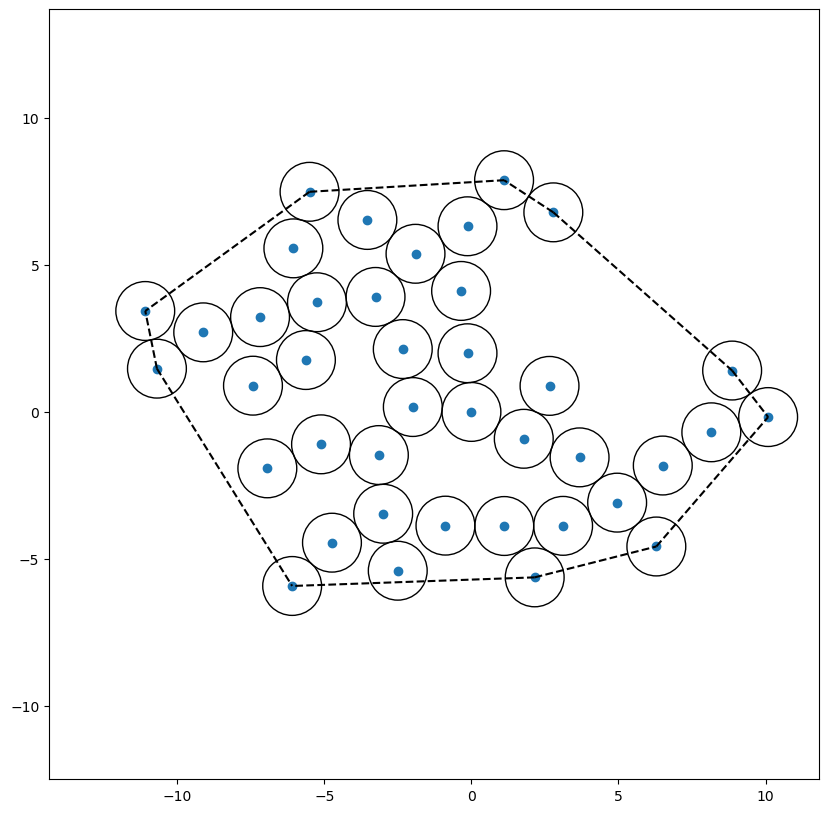

In [9]:
hull = ConvexHull(positions)
plt.plot(positions[:,0], positions[:,1], 'o')

for simplex in hull.simplices:

    plt.plot(positions[simplex, 0], positions[simplex, 1], 'k',linestyle='--')

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radii[ii], color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2.0
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])

plt.show()

# What's the geometrical interpretation of the convex hull?

A convex figure does not have holes or its boundary does not bend into the figure. Formally, if for any two points x1 and x2, in A the line segment joining the points is contained in A,then we call the set A a convex set; otherwise, a non-convex set.

A formal definition of the convex hull of a set A: consider all possible convex sets that contain the set A. The number of such sets is infinite. We take the intersection of all such convex sets. Then the resulting set is called the convex hull of the set A. Since the intersection of convex sets is a convex set, the convex hull of the set A is a convex set. Moreover, it is the ‘smallest’ convex set that contains the set A. Obviously, if the set A is a convex set, then the convex hull of A is A itself.

As a special type of a convex hull, we define a simplex. A simplex in Rm is the convex hull of any set of 
m + l points which do not all lie on one hyperplane in R^m. If m = 0, the simplex is a point itself, called the zeroth-order simplex; if m = 1, the simplex is the straight line segment connecting two points, called the first-order simplex ; if m = 2, the simplex is a triangle, called the second-order simplex; if m = 3, the simplex is a tetrahedron, called the third-order simplex, and so forth. 

The second-order simplex it's related with the Delaunay triangulation on a plane as well as to the Voronoi diagram.

One of the properties of the Delaunay triangulation is that: The external Delaunay edges in a Delaunay triangulation of P constitute the boundary of the convex hull of P. Being P the set of all generator points, in this case represented by the hard discs.


Okabe, A.; Boots, B.; and Sugihara, K. Spatial Tessellations: Concepts and Applications of Voronoi Diagrams, 2nd ed. New York: Wiley, 2000.

# Alpha spheres


Lets see the meaning of voronoi vertices:

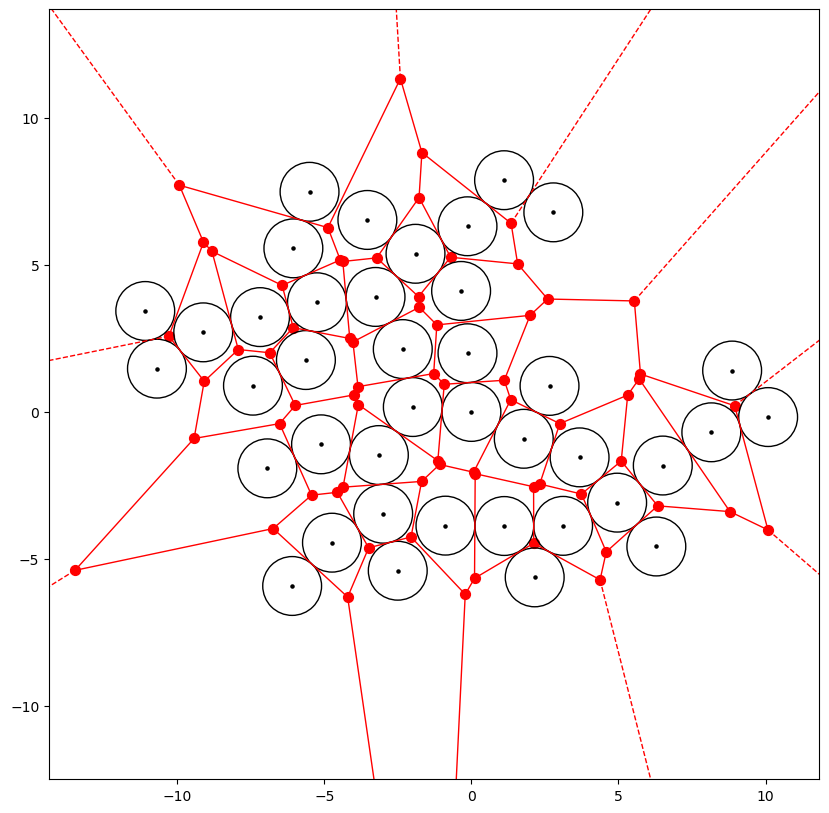

In [10]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.scatter(vor.vertices[:,0], vor.vertices[:,1], s=50, c='red')

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radii[ii], color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2.0
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

Each vertex is at the same distance of three "atoms" centers. And each vertex is at the border of three voronoi regions. Thus, each vertex is the center of an alpha-circle "touching" three "atoms" centers.

In [11]:
vor.regions # each region is enclosed by a list of vertices found in the following lists

[[10, 7, 8, -1, 9],
 [],
 [15, 13, 12, 11, 14],
 [14, 8, -1, 11],
 [12, -1, 11],
 [19, 0, 5, 6, 7, 8, 14, 15, 18],
 [21, 3, -1, 2, 20],
 [24, 22, 20, 2, 23],
 [26, 5, 0, 1, 4, 25],
 [29, 3, -1, 28],
 [32, 18, 15, 13, 31],
 [34, 29, 3, 21, 33],
 [37, 27, 25, 4, 36],
 [41, 6, 5, 26, 40],
 [42, 39, 30, 10, 7, 6, 41],
 [48, 43, 45, 44, 46, 47],
 [48, 31, 32, 43],
 [45, 19, 18, 32, 43],
 [46, 16, 17, 44],
 [45, 19, 0, 1, 17, 44],
 [48, 31, 13, 12, -1, 47],
 [55, 53, 52, 51, 50, 49, 54],
 [50, 33, 34, 35, 49],
 [51, 22, 20, 21, 33, 50],
 [52, 27, 37, 38, 24, 22, 51],
 [53, 40, 26, 25, 27, 52],
 [55, 42, 41, 40, 53],
 [60, 56, 57, 58, 59],
 [57, 38, 37, 36, 56],
 [60, 16, 17, 1, 4, 36, 56],
 [58, 23, 24, 38, 57],
 [59, -1, 2, 23, 58],
 [60, 16, 46, 47, -1, 59],
 [67, 65, 61, 64, 63, 62, 66],
 [64, 54, 55, 42, 39, 61],
 [65, 30, 39, 61],
 [63, 35, 34, 29, 28, 62],
 [66, -1, 28, 62],
 [64, 54, 49, 35, 63],
 [67, 9, 10, 30, 65],
 [67, 9, -1, 66]]

In [12]:
vor.point_region # Each point (the center of each "atom") belongs to the following region

array([ 8, 13, 19, 25, 17, 26, 16, 15, 34, 35, 38, 32, 10, 39, 12, 20, 14,
       24, 28, 18, 21,  5, 29, 30,  2, 22,  4, 36, 33, 40, 23, 11,  6,  0,
       37,  9,  7, 31, 27,  3])

Let's for instance choose a point to show its region and the vertices defining it:

[26, 5, 0, 1, 4, 25]


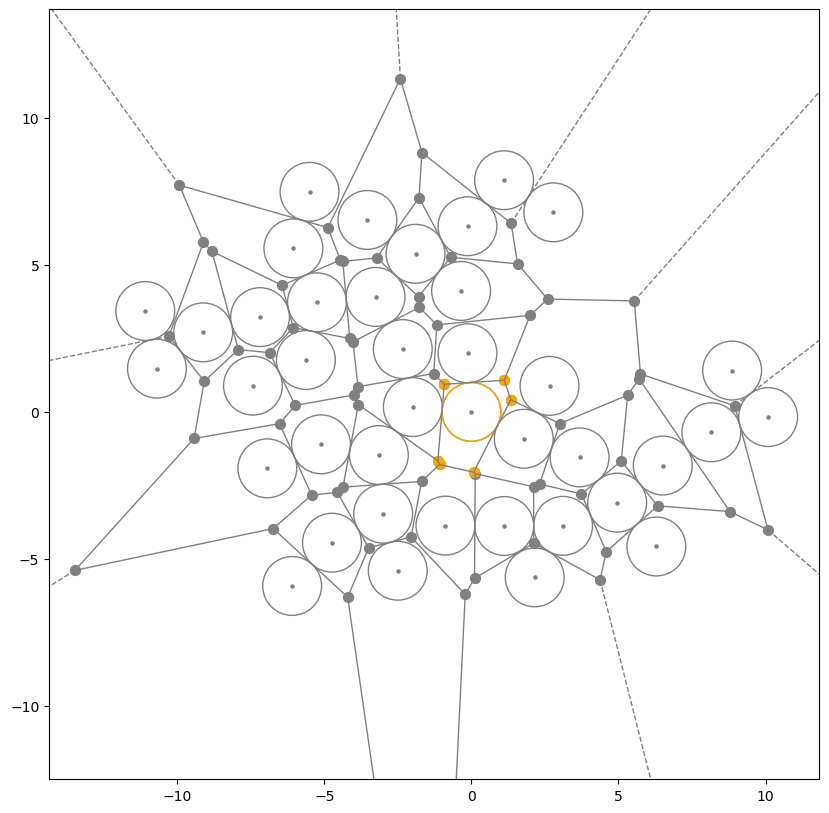

In [13]:
index_point_choosen = 0

region_choosen = vor.point_region[index_point_choosen]
vertices_choosen = vor.regions[region_choosen]
if -1 in vertices_choosen:
    _ = vertices_choosen(-1) # Removing -1 (vertex at infinitum)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='gray')

plt.scatter(vor.vertices[:,0], vor.vertices[:,1], s=50, c='gray')

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radii[ii], color='gray', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='gray')

# choosen elements:

ax.add_patch(plt.Circle(positions[index_point_choosen,:], radius= radii[index_point_choosen],
                        color='orange', fill=False))

for ii in vertices_choosen:
    plt.scatter(vor.vertices[ii,0], vor.vertices[ii,1], s=50, c='orange')

print(vertices_choosen)
    
l_box = np.abs(positions).max() + 2.0
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

Each vertex is the center of an alpha-circle. And each vertex belong to three regions, and each region has a point in its center. So, we create a list of 3 points for each vertex. Let's do it.

In [14]:
n_vertices = vor.vertices.shape[0]
n_regions = len(vor.regions)
n_points = vor.npoints # The number of original centers: 20 atoms

points_of_vertex = [[] for ii in range(n_vertices)]
region_point={vor.point_region[ii]:ii for ii in range(n_points)}

for region_index in range(n_regions):
    region=vor.regions[region_index]
    if len(region)>0:
        point_index=region_point[region_index]
        for vertex_index in region:
            if vertex_index != -1:
                points_of_vertex[vertex_index].append(point_index)

Now, we know the three points for each vertex:

In [15]:
points_of_vertex

[[21, 0, 2],
 [0, 2, 22],
 [32, 36, 37],
 [32, 35, 31],
 [0, 14, 22],
 [21, 0, 1],
 [21, 1, 16],
 [33, 21, 16],
 [33, 39, 21],
 [33, 13, 29],
 [33, 16, 13],
 [24, 39, 26],
 [24, 26, 15],
 [24, 12, 15],
 [24, 39, 21],
 [24, 21, 12],
 [19, 22, 11],
 [19, 2, 22],
 [21, 12, 4],
 [21, 4, 2],
 [32, 36, 30],
 [32, 31, 30],
 [36, 30, 17],
 [36, 23, 37],
 [36, 17, 23],
 [0, 14, 3],
 [0, 1, 3],
 [14, 17, 3],
 [35, 27, 34],
 [35, 31, 27],
 [16, 9, 13],
 [12, 6, 15],
 [12, 6, 4],
 [31, 25, 30],
 [31, 25, 27],
 [25, 27, 10],
 [14, 18, 22],
 [14, 17, 18],
 [17, 18, 23],
 [16, 8, 9],
 [1, 3, 5],
 [1, 16, 5],
 [16, 5, 8],
 [7, 6, 4],
 [7, 19, 2],
 [7, 4, 2],
 [7, 19, 11],
 [7, 15, 11],
 [7, 6, 15],
 [20, 25, 10],
 [20, 25, 30],
 [20, 30, 17],
 [20, 17, 3],
 [20, 3, 5],
 [20, 8, 10],
 [20, 5, 8],
 [38, 18, 22],
 [38, 18, 23],
 [38, 23, 37],
 [38, 37, 11],
 [38, 22, 11],
 [28, 8, 9],
 [28, 27, 34],
 [28, 27, 10],
 [28, 8, 10],
 [28, 9, 13],
 [28, 34, 29],
 [28, 13, 29]]

We also know that a pair of points define a ridge. The dictionary `ridge_dict` keeps the relation ship between each pair points and the pair of vertices defining the ridge (remember, -1 means infinitum -no vertex-):

In [16]:
vor.ridge_dict

{(33, 16): [7, 10],
 (33, 21): [7, 8],
 (33, 39): [-1, 8],
 (33, 29): [-1, 9],
 (33, 13): [9, 10],
 (24, 39): [11, 14],
 (24, 26): [11, 12],
 (24, 15): [12, 13],
 (24, 12): [13, 15],
 (24, 21): [14, 15],
 (39, 26): [-1, 11],
 (39, 21): [8, 14],
 (26, 15): [-1, 12],
 (21, 2): [0, 19],
 (21, 0): [0, 5],
 (21, 1): [5, 6],
 (21, 16): [6, 7],
 (21, 12): [15, 18],
 (21, 4): [18, 19],
 (32, 37): [-1, 2],
 (32, 35): [-1, 3],
 (32, 36): [2, 20],
 (32, 31): [3, 21],
 (32, 30): [20, 21],
 (36, 37): [2, 23],
 (36, 30): [20, 22],
 (36, 17): [22, 24],
 (36, 23): [23, 24],
 (0, 2): [0, 1],
 (0, 22): [1, 4],
 (0, 14): [4, 25],
 (0, 1): [5, 26],
 (0, 3): [25, 26],
 (35, 34): [-1, 28],
 (35, 31): [3, 29],
 (35, 27): [28, 29],
 (12, 15): [13, 31],
 (12, 4): [18, 32],
 (12, 6): [31, 32],
 (31, 30): [21, 33],
 (31, 27): [29, 34],
 (31, 25): [33, 34],
 (14, 22): [4, 36],
 (14, 3): [25, 27],
 (14, 17): [27, 37],
 (14, 18): [36, 37],
 (1, 16): [6, 41],
 (1, 3): [26, 40],
 (1, 5): [40, 41],
 (16, 13): [10, 30]

We can now define the set of alpha-circles. Each vertex define the center of an alpha-circle, this way we have as many alpha-circles as centers. The radius of an alpha-circle is the distance between its center and any of the three contacted points.

In [17]:
from scipy.spatial.distance import euclidean as distance

n_alpha_circles = n_vertices
alpha_circle_centers = vor.vertices
alpha_circle_radius = [distance(vor.vertices[ii], positions[points_of_vertex[ii][0]]) for ii in range(n_vertices)]
alpha_circle_contacted_points = points_of_vertex

We can already show the alpha-circles in a plot

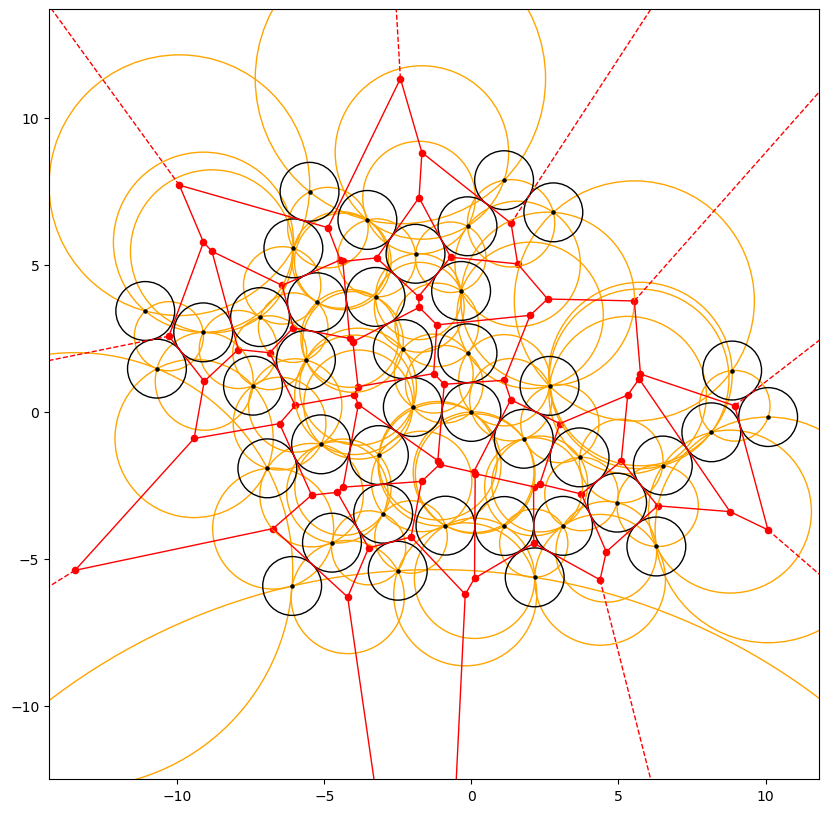

In [18]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.scatter(vor.vertices[:,0], vor.vertices[:,1], s=20, c='red')

ax=plt.gca()

for ii in range(n_alpha_circles):
    ax.add_patch(plt.Circle(alpha_circle_centers[ii,:], radius= alpha_circle_radius[ii], color='orange', fill=False))

for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radii[ii], color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2.0
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

Finnally lets have a look to the radii of the alpha-circles. Do we have more large alpha-circles than small ones?

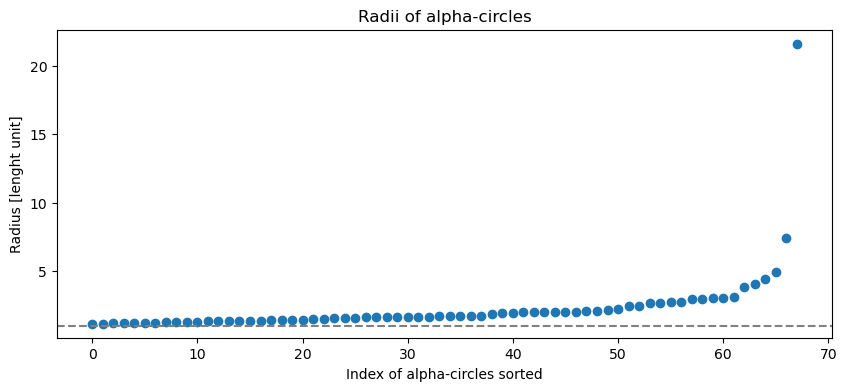

In [19]:
plt.rcParams["figure.figsize"] = (10,4)
plt.scatter(range(n_alpha_circles), np.sort(alpha_circle_radius))
plt.axhline(y=1, color='gray', linestyle='--')# Reference line with the size of each atom
plt.title('Radii of alpha-circles')
plt.xlabel('Index of alpha-circles sorted')
plt.ylabel('Radius [lenght unit]')
plt.show()